<a href="https://colab.research.google.com/github/okcy58/AI2022/blob/main/NumPy_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy: Numerical Python

- 빠르고 메모리를 효율적으로 사용하여 벡터 산술연산과 브로드캐스팅 기능을 제외하는 다차원배열 ndarray
- 반복문을 작성할 필요없이 전체 데이터배열에 대해 빠른 연산을 제공하는 표준 수학함수
- 배열데이터를 디스크에 쓰거나 읽을 수 있는 도구, 메모리에 올려진 파일을 사용하는 도구
- 선형대수, 난수발생기, 푸리에 변환 기능
- C, C++, 포트란으로 쓰여진 코드를 통합하는 도구

> - https://docs.scipy.org/doc/numpy/user/index.html
> - http://www.scipy-lectures.org/
> - Python for Data Analysis, Wes Mckinney, 한빛미디어, CH.4, CH.12

## 파이썬 list와 numpy 배열의 연산 시간 비교
- 파이썬 list를 이용한 벡터 덧셈: for 문을 사용하여 요소간 덧셈
- numpy : 배열을 사용

In [ ]:
import sys
from datetime import datetime
import numpy as np

def numpysum(n):
   a = np.arange(n) * 1
   b = np.arange(n) * 2
   c = a + b

   return c

def pythonsum(n):
   a = list(range(n))
   b = list(range(n))
   c = []

   for i in range(len(a)):
       a[i] = i * 1
       b[i] = i * 2
       c.append(a[i] + b[i])

   return c

In [ ]:
size = 1000000

start = datetime.now()
c = pythonsum(size)
delta = datetime.now() - start
print("The last 2 elements of the sum", c[-2:])
print("PythonSum elapsed time in microseconds", delta.microseconds)
print()

start = datetime.now()
c = numpysum(size)
delta = datetime.now() - start
print("The last 2 elements of the sum", c[-2:])
print("NumPySum elapsed time in microseconds", delta.microseconds)

The last 2 elements of the sum [2999994, 2999997]
PythonSum elapsed time in microseconds 426048

The last 2 elements of the sum [2999994 2999997]
NumPySum elapsed time in microseconds 17742


### 데이터분석 app.에서 요구되는 기능
- 빠른 vector 배열에 대한 연산: data 개조(munging), 정제(cleaning), 부분집합(subsetting), filtering, 변형(transformation)
- 공통배열 알고리듬: sorting, unique, set operation
- 효과적인 기술통계와 데이터 수집/요약
- 데이터 alignment와 관계 조작: 이질적 데이터의 merging과 joining
- 배열 표현으로 조건절 logic 표현
- group 데이터 조작=> pandas

## 1. NumPy ndarray: 다차원 배열 객체

- 모든 원소는 같은 자료형
- vector 요소 전체에 대한 연산 적용

In [ ]:
import numpy as np

In [ ]:
data=np.array([[0.9526, -0.246, -0.8856],[0.5639,0.2379,0.9104]])
data

array([[ 0.9526, -0.246 , -0.8856],
       [ 0.5639,  0.2379,  0.9104]])

In [ ]:
data * 10

array([[ 9.526, -2.46 , -8.856],
       [ 5.639,  2.379,  9.104]])

In [ ]:
data + data

array([[ 1.9052, -0.492 , -1.7712],
       [ 1.1278,  0.4758,  1.8208]])

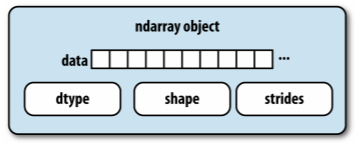
- shape 튜플: 각 차원의 크기
- dtype 객체: 배열의 자료형 (자료형이 명시되지 않으면 float64)
- ndim: Number of array dimensions
- stride: 하나의 원소에서 다음 원소까지의 너비를 표현
    - 3x4x5 크기의 float64(8bytes) 배열의 stride (160,40,8)
    - 4x5 x 8 = 160
    - 5 x 8 = 40
    - 8

In [ ]:
data.shape

(2, 3)

In [ ]:
data.dtype

dtype('float64')

In [ ]:
data.ndim

2

In [ ]:
data.strides

(24, 8)

### 1.1 ndarray 생성: array 함수

In [ ]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

In [ ]:
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2

### 배열생성 함수
- array: 입력데이터(리스트, 튜플, 배열 등 순차데이터)를 ndarray로 변환, dtype이 명시되지 않은 경우는 추론하여 저장, 입력데이터 복사
- asarray: 입력데이터를 ndarray로 변환, 입력 data가 ndarray일 경우는 복사하지 않음
- zeros, zero_like: 주어진 dtype과 주어진 모양의 배열 내용은 모두 0로 초기화
- ones, ones_like : 주어진 dtype과 주어진 모양의 배열 내용은 모두 1로 초기화
- empty, empty_like : 주어진 dtype과 주어진 모양의 배열 내용은 초기화하지 않음
- eye, identity: NxN 크기의 단위 행렬

In [ ]:
np.zeros(10)

In [ ]:
np.zeros_like((2,5,7), float)

In [ ]:
np.ones((3,6))

In [ ]:
np.ones_like((2,5), float)  # 실수 두 개의 원소를 가진 배열(초기값 1) 

In [ ]:
np.empty((2,3,4)) # 실수를 가진 3차원(2x3x4) 배열(초기값 없음)

In [ ]:
np.empty_like((2,3,4)) # 정수 3 개의 원소를 가진 배열 

In [ ]:
print(np.identity(3))
np.eye(4)

In [ ]:
# arange: range 함수의 배열 버전
np.arange(10)

### 1.2 ndarray의 자료형
- NumPy dtype Hierarchy

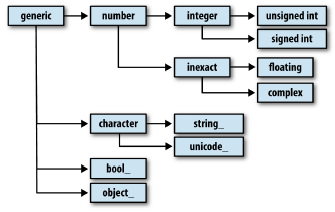

종류 | Type Code | 설명
-----| ----------|-----
int8, uint8 | i1, u1 | 부호 정수 8bit, unsigned 8bit 정수
int16, uint16 | i2, u2 | 부호 정수 16bit, unsigned 16bit 정수
int32, uint32 | i4, u4 | 부호 정수 32bit, unsigned 32bit 정수
int64, uint64 | i8, u8 | 부호 정수 64bit, unsigned 64bit 정수
float16 | f2 | 반정밀도 부동소수점
float32 | f4 | 단정밀도 부동소수점 (C의 float와 호환)
float64 | f8 | 배정밀도 부동소수점 (C의 double와 호환, python의 float)
float128 | f16, g | 확장정밀도 부동소수점
complex64 | c8 | 2개의 32bit 부동소수점의 복소수
complex128 | c16 | 2개의 64bit 부동소수점의 복소수
complex256 | c32 | 2개의 128bit 부동소수점의 복소수
bool | ? | True, False
object | O | python 객체형
string\_ | S | 고정길이 문자열형
unicode\_ | U | 고정길이 unicode형

- astype method: 배열의 dtype 변경
- astype: 새로운 배열을 생성(데이터복사하면서 형변환)

In [ ]:
arr = np.array([1,2,3,4,5])
arr.dtype

In [ ]:
float_arr = arr.astype(np.float64)
float_arr

In [ ]:
arr = np.array([3.7,-1.2, -2.6, 0.5, 12.9, 10.1])
arr.astype(np.int32)

In [ ]:
numeric_string = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_string

In [ ]:
numeric_string.astype(float64)  # string의 float64변환 실패
numeric_string

In [ ]:
numeric_string.astype(float)

In [ ]:
empty_unit32 = np.empty(8, dtype='u4')
empty_unit32

### 1.3 배열과 scalar 간의 연산

- 벡터화: NumPy에서 배열은 for 문을 사용하지 않고 데이터를 일괄 처리
- 같은 크기의 배열 간 산술연산은 배열의 각 요소 단위로 적용
- 크기가 다른 배열 산의 연산은 broadcasting => ** 고급 NumPy **

In [ ]:
arr = np.array([[1, 2, 3],[4, 5, 6]])
arr

In [ ]:
arr * arr

In [ ]:
arr + arr

- scalar 값에 대한 산술연산은 각 요소로 전달

In [ ]:
1/arr

In [ ]:
arr ** .5

### 1.4 색인과 slicing

In [ ]:
arr = np.arange(10)
arr

In [ ]:
arr[4] # index 4

In [ ]:
arr[5:8] # index 5,6,7

In [ ]:
arr[5:8] = 12
arr

- 배열 조각(slice)은 원본 배열의 뷰(view) => 복사되지 않음
- 뷰에 대한 변경은 원본 배열에 반영
- slice의 복사 => arr[5:8].copy()

In [ ]:
arr_slice = arr[5:8]
arr_slice[1] = 234
arr

In [ ]:
arr_slice[:] = 64  # 전체
arr

- 다차원 배열
- 2차원 배열에서 각 색인: 1차원 배열
![그림4-1](img/p087.png)

In [ ]:
arr2d = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])
arr2d[2]

In [ ]:
arr2d[0][2]

In [ ]:
arr2d[0, 2]

In [ ]:
arr2d[[0],[2]]

In [ ]:
arr2d.shape

In [ ]:
arr2d[:2]

In [ ]:
arr2d[:2,1:]

In [ ]:
arr3d = np.array([[[1, 2, 3],[4, 5, 6]],[[7, 8, 9],[10,11,12]]])
arr3d.shape

In [ ]:
arr3d[0]

In [ ]:
arr3d[0][1]

- Two-dimensional array slicing
![그림4-2](img/p090.png)

### 1.5 boolean 색인

In [ ]:
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
names

In [ ]:
names=='Bob'

In [ ]:
data = np.random.randn(7,4)
data

In [ ]:
data[names=='Bob']

- boolean 배열의 길이는 반드시 색인하려는 축의 길이와 동일해야 함.

In [ ]:
data[names=='Bob', 2:]

In [ ]:
names != 'Joe'

In [ ]:
data[~(names == 'Joe')]

In [ ]:
mask = (names == 'Bob')|(names == 'Will')
mask

In [ ]:
data[mask]

In [ ]:
data[data<0] = 0
data

In [ ]:
data[names != 'Joe'] = 7
data

### 1.6 팬시 색인
- 정수 배열을 사용한 색인
- 선택된 데이터를 새로운 배열로 복사 

In [ ]:
arr = np.empty((8,4))
for i in range(8):
    arr[i]=i
arr

In [ ]:
arr[[4,3,0,6]]

In [ ]:
arr[[-3,-5,-7]]

In [ ]:
arr = np.arange(32).reshape((8,4))
arr

In [ ]:
arr[[1,5,7,2],[0,3,1,2]]

In [ ]:
arr[(1,5,7,2),(0,3,1,2)]

In [ ]:
arr[[1,5,7,2]][:,[0,3,1,2]]

In [ ]:
arr[np.ix_([1,5,7,2],[0,3,1,2])]

### 1.7 배열 전치(transpose)와 축 바꾸기
- 전치: 데이터 보양이 바뀐 view 반환

In [ ]:
arr = np.arange(15).reshape((3,5))
arr

In [ ]:
arr.T # arr.transpose() 와 동일

In [ ]:
arr.transpose()

- 행렬 내적: $X^{T}\cdot X$
- arr.T, arr.transpose(), arr.swapaxes()

In [ ]:
arr = np.random.randn(6,3)
arr

In [ ]:
np.dot(arr.T,arr)

In [ ]:
arr.T

In [ ]:
arr.transpose(1,0)

In [ ]:
arr = np.arange(16).reshape((2,2,4))
arr

In [ ]:
arr.transpose(1,0,2)

In [ ]:
arr.swapaxes(1,2)

## 2. 유니버설 함수

- ufunc: ndarray 안에 있는 데이터 원소별로 연산을 수행하는 함수

In [ ]:
import numpy as np

In [ ]:
arr = np.arange(10)
np.sqrt(arr)

In [ ]:
np.exp(arr)

In [ ]:
x = np.random.randn(10)
x

In [ ]:
y = np.random.randn(10)
y

In [ ]:
np.maximum(x,y)  # element-wise maximum

In [ ]:
arr = x*5
arr

In [ ]:
np.modf(arr)

### 단항 유니버설 함수

함수 | 설명
-----|-----
abs, fabs|각 원소(정수,실수,복소수)의 절대값. 복소수가 아닌 경우 fabs
sqrt| arr ** 0.5
square| arr ** 2
Exp | e**x
Log,log10,log2,log1p| log1p => log(1+x)
sign|1(양수), 0(0), -1(음수)
ceil|소수자리 올림
floor|소수자리 자름
rint| 소수자리 반올림
modf|몫과 나머지를 배열로 반환
isnan|숫자인지 아닌지
isfinite, isinf|원소가 유한한지, 무한한지
cos,cosh,sin,sinh,tan,tanh|삼각함수
arccos,arccosh,arcsin,arcsinh,arctan,arctanh|역삼각함수
logical_not|~arr (논리부정)

### 이항 유니버설 함수

함수 | 설명
-----|-----
add, subtract, mutiply, divide, floor_divide|사칙연산
power(x,y)|x**y
maximum, fmax, minimum, fmin|최대, 최소값, fmax/fmin는 NaN은 무시
mod|나머지
copysign(x,y)| x의 기호를 y의 기호로 바꿈
greater, greater_equal,..| >,>=, ...
logical_and, logical_or, logical_xor| &

## 3. 배열을 사용한 데이터 처리

- 벡터화: 배열연산을 사용해서 반복문을 명시적으로 제거하는 기법
- 순수 파이썬 연산에 비해 빠르다

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
point = np.arange(-5,5,0.01)
xs,ys = np.meshgrid(point,point)
ys

In [ ]:
z = np.sqrt(xs**2+ys**2)
z

In [ ]:
plt.imshow(z,cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2+y^2}$ for a grid of values")
plt.show()

### 3.1 배열연산으로 조건절 표현하기
- where: x if 조건 else y

In [ ]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [ ]:
result = [(x if c else y) for x,y,c in zip(xarr,yarr,cond)]
result

- 위 (x if c else y) 방식(list comprehension)은 큰 배열을 빠르게 처리하지 못하고 다차원 배열에서는 사용 못함
- numpy.where 함수

In [ ]:
result1 = np.where(cond, xarr, yarr)
result1

In [ ]:
arr = np.random.randn(4,4)
arr

In [ ]:
np.where(arr>0,2,-2)  # arr의 원소가 0보다 크면 2로, 아니면 -2

In [ ]:
np.where(arr>0,2,arr)  # arr의 원소가 0보다 크면 2로, 본래 원소값

### 3.2 수학 및 통계 method
- where: x if 조건 else y

### 기본 배열 통계 method

method | 설명
-----|-----
sum|배열전체 혹은 특정 axes에 대한 원소의 합
mean|산술평균
std, var|표준편차(std), 분산(var)
min, max|최소값, 최대값
argmin, argmax| 최소/최대 원소의 색인값
cumsum| 각 원소의 누적 합
cumprod| 각 원소의 누적 곱

In [ ]:
arr = np.random.randn(5,4)
arr

In [ ]:
arr.mean()

In [ ]:
np.mean(arr)

In [ ]:
arr.mean(axis=0) # arr.mean(0)와 동일

In [ ]:
arr.mean(axis=1) # arr.mean(1)와 동일

- axes = 0 : 첫번째 원소 중심(arr[0,0,0], arr[1,0,0], arr[2,0,0], arr[3,0,0],,,)
- axes = 1 : 두번째 원소 중심(arr[0,0,0], arr[0,1,0], arr[0,2,0], arr[0,3,0],,,)

In [ ]:
arr.max()

In [ ]:
arr.argmax()

### 3.3 boolean 배열을 위한 method
- boolean 값: 1(True), 0(False)
- sum: True 갯수
- any: 하나 이상의 True 값이 있는지?
- all: 모든 원소가 True인가?

In [ ]:
arr = np.random.randn(100)

(arr>0).sum()  # 0 보다 큰 수의 갯수

In [ ]:
bools = np.array([False, True, False, False])
bools.any()

In [ ]:
bools.all()

### 3.4 정렬
- sort method
- 배열을 직접 변경하지 않고 정렬된 결과를 가진 복사본을 반환

In [ ]:
arr = np.random.randn(10)
arr

In [ ]:
arr.sort()
arr

- 다차원 배열의 정렬은 축의 값에 따라 1차원 부분을 정렬

In [ ]:
arr.sort(0)
arr

In [ ]:
arr = np.random.randn(5,3)
arr

In [ ]:
arr.sort(1)
arr

In [ ]:
arr.sort(0)
arr

- 배열의 분위수(quantile)

In [ ]:
large_arr = np.random.randn(1000)
large_arr.sort()

In [ ]:
large_arr[int(0.05 * len(large_arr))]  # 5% 분위값

### 3.5 집합함수
method | 설명
-----|-----
unique(x)| 배열 x에서 중복된 원소 제거하고 남은 원소를 정렬
intersect1d(x,y)| 배열 x와 y에 공통적인 원소를 정렬
union1d(x,y)| 두 배열의 합집합
in1d(x,y):|x의 각 원소가 y에 포함하는지의 boolean
setdiff1d(x,y)| x와 y의 차집합
setxor1d(x,y)| 한 배열에는 포함되지만 다른 배열에는 포함되지 않는 원소들의 집합

In [ ]:
names=np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

In [ ]:
sorted(set(names))

In [ ]:
values = np.array([6,0,0,3,2,5,6])
np.in1d(values,[2,3,6])

## 4. 배열의 파일 입출력

### 4.1 배열을 바이너리 형식으로 저장하기
- np.save/load: 압축되지 않은 raw 바이너리 형식을 저장/불러오기, .npy 확장자
- np.savez: 여러 개의 배열을 압축된 형식으로 저장, npz 확장자
  => 불러오기(load) : 각각의 배열을 사전형식의 객체에 저장

In [ ]:
import numpy as np

In [ ]:
arr = np.arange(10)
np.save('some_array', arr)

In [ ]:
np.load('some_array.npy')

In [ ]:
np.savez('array_archive.npz', a=arr, b=arr)

In [ ]:
arch = np.load('array_archive.npz')
arch['b']

### 4.2 텍스트 파일 불러오기와 저장하기
- read_cvs, read_table: pandas 모듈
- np.loadtxt, np.getfromtxt

In [ ]:
!type array_ex.txt

In [ ]:
arr = np.loadtxt('array_ex.txt', delimiter=',')
arr

## 5. 선형대수
function | 설명
-----|-----
diag| 정사각행렬의 대각선 원소를 1차원 배열로 반환
|1차원 배열을 정사각행렬의 대가선 원소로 하고 나머지는 0
dot| 행렬곱셉(내적)
trace| 대각선 원소의 합을 계산
det| 행렬식 계산
eig| 정사각형 행렬의 고유갑(eigen value)과 고유벡터
inv| 역행렬
pinv| 행렬의 무어-펜로즈 유사역원 역행렬
qr| QR 분해를 계산
svd| 특이값 분해(SVD)
solve| Ax=b를 만족하는 x
lstsq| y=xb를 만족하는 최소제곱해

In [ ]:
import numpy as np

In [ ]:
X = np.random.randn(5,5)
X

In [ ]:
mat=X.T.dot(X)
mat

In [ ]:
INV=np.linalg.inv(mat)
INV

In [ ]:
mat.dot(INV)

In [ ]:
q,r=np.linalg.qr(mat)
r

In [ ]:
q

## 6. 난수 생성
function | 설명
-----|-----
seed| 난수 발생기의 seed를 지정
permutation| 순서를 임의로 바꾸거나 임의의 순열을 반환
shuffle| 리스트나 배열의 순서를 뒤섞는다
rand| 균등분포에서 표본 추출
randint| 주어진 최소/최대 범위 내에서 임의의 난수 추출
randn| 표준편차가 1이고 평균값이 0인 정규분포에서 표본 추출
binomial| 이항분포에서 표본 추출
normal| 정규분포(가우시안)에서 표본 추출
beta| 베타분포에서 표본 추출
chisquare| 카이제곱분포에서 표본 추출
gamma| 감마분포에서 표본 추출
uniform| 균등(0,1)분포에서 표본 추출

In [ ]:
# random.normal은 다양한 종류의 확률분포로부터 표본 값을 생성
samples = np.random.normal(size=(4,4))
samples

- 파이썬 내장함수 random은 한 번에 하나의 값만 생성
- random.normal은 매우 큰 표본을 빠르게 생성

In [ ]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0,1) for _ in range(N)]

In [ ]:
%timeit np.random.normal(size=N)

## 7. 계단 오르내리기 예제
- 배열 연산의 활용

In [ ]:
import random
position=0
walk = [position]
steps =100
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

In [ ]:
walk

In [ ]:
plt.plot(walk[:100])

In [ ]:
import numpy as np

In [ ]:
nsteps = 100

In [ ]:
draws = np.random.randint(0,2,size=nsteps)

In [ ]:
draws

In [ ]:
steps = np.where(draws>0, 1, -1)
steps

In [ ]:
walk = steps.cumsum()

In [ ]:
walk.min()

In [ ]:
walk.max()

In [ ]:
(np.abs(walk) >= 6).argmax()

In [ ]:
nwalks = 5000
nsteps = 1000

In [ ]:
draws = np.random.randint(0,2,size=(nwalks,nsteps))
draws.shape

In [ ]:
steps = np.where(draws>0, 1, -1)
steps

In [ ]:
walks = steps.cumsum(1)  # 각 열의 누적 합(첫번째열,첫번째+두번째열, 첫번째+두번째+세번째열, .....)
walks

In [ ]:
walks.min()

In [ ]:
walks.max()

In [ ]:
hit30 = (np.abs(walks) >= 30).any(1)
hit30

In [ ]:
hit30.sum()

In [ ]:
crossing_times = (np.abs(walks[hit30]) >= 30).argmax(1)
crossing_times.shape

In [ ]:
crossing_times

In [ ]:
crossing_times.mean()